In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("daiict_faculty_transformed.csv")
df

,faculty_id,name,faculty_type,education,bio,specialization_list,research_tags,email,phone,address,combined_text
0,1,Abhishek gupta,Faculty,"PhD (Electrical and Computer Engineering), Tor...",Dr. Abhishek Gupta received his PhD in Electri...,"['machine learning', 'statistical signal proce...","['vision', 'signal processing', 'signal', 'veh...",abhishek_gupta@dau.ac.in,07968261598,"# 3208, FB-3, DAU, Gandhinagar, Gujarat, India...",Name: Abhishek gupta | Role: Faculty | Educati...
1,2,Abhishek jindal,Faculty,"PhD (Electronics & Communication Engineering),...",I received the B. Tech. and M. Tech. degrees f...,"['reinforcement learning', 'deep learning for ...","['systems', 'reinforcement', 'communication', ...",abhishek_jindal@dau.ac.in,07968261654,"# 4101, FB-4, DA-IICT, Gandhinagar, Gujarat, I...",Name: Abhishek jindal | Role: Faculty | Educat...
2,3,Abhishek tilva,Faculty,"PhD (Statistics), Columbia University, New Yor...",Abhishek Tilva currently serves as an Assistan...,"['arbitrage theory', 'stochastic portfolio the...","['arbitrage', 'analysis', 'stochastic', 'portf...",abhishek_tilva@dau.ac.in,07968261549,"# 2209, FB-2, DA-IICT, Gandhinagar, Gujarat, I...",Name: Abhishek tilva | Role: Faculty | Educati...
3,4,Aditya tatu,Faculty,"PhD (Computer Science), University of Copenhag...",Aditya Tatu received his Phd from the Departme...,"['computer vision', 'image processing', 'patte...","['vision', 'signal', 'pattern', 'ai', 'compute...",aditya_tatu@dau.ac.in,07968261540,"#1206, FB-1, DA-IICT, Gandhinagar, Gujarat, In...",Name: Aditya tatu | Role: Faculty | Education:...
4,5,Ajay beniwal,Faculty,PhD (Electronics and Communication Engineering...,Dr. Ajay Beniwal is currently serving as an As...,['flexible and printable electronics for healt...,"['with', 'applications', 'healthcare', 'flexib...",ajay_beniwal@dau.ac.in,07968261745,"# 3211, FB-3, DA-IICT, Gandhinagar, Gujarat, I...",Name: Ajay beniwal | Role: Faculty | Education...
...,...,...,...,...,...,...,...,...,...,...,...
107,108,Ranjan pal,Adjunct faculty international,"PhD (Computer Science), Provost PhD Fellow (Hi...",Not Available,"['cyber risk management', 'cyber resilience', ...","['decision', 'management', 'cybersecurity', 's...","ranjanpal9@gmail.com,ranjanp@mit.edu",Not Available,Not Available,Name: Ranjan pal | Role: Adjunct faculty inter...
108,109,Rita chakravarti,Adjunct faculty international,"PhD (Multivariate Analysis), University of Pit...",Not Available,[],[],rita_chakravarti@dau.ac.in,Not Available,Not Available,Name: Rita chakravarti | Role: Adjunct faculty...
109,110,S. lakshmivarahan,Adjunct faculty international,"PhD (Electrical Engineering), Indian Institute...",Not Available,"['big data analytics', 'dynamic data assimilat...","['interconnection', 'data', 'dynamics', 'compu...",s_lakshmivarahan@dau.ac.in,Not Available,Not Available,Name: S. lakshmivarahan | Role: Adjunct facult...
110,111,Stefano mizzaro,Adjunct faculty international,"PhD (Information Engineering), University of T...",Not Available,"['information retrieval', 'artificial intellig...","['information', 'artificial', 'intelligence', ...",mizzaro@uniud.it,Not Available,Not Available,Name: Stefano mizzaro | Role: Adjunct faculty ...


In [4]:
faculty_counts = df["faculty_type"].value_counts()
faculty_counts


faculty_type
Faculty                          67
Adjunct Faculty                  26
Adjunct faculty international    11
Professor of Practice             4
Distinguished Professor           2
Name: count, dtype: int64

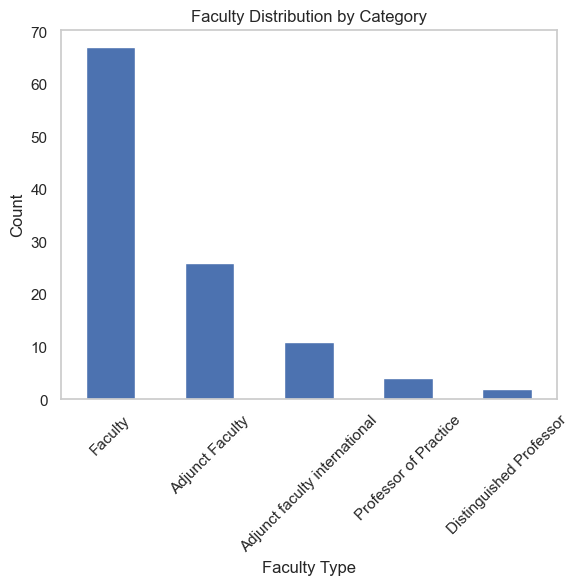

In [15]:
plt.figure()
faculty_counts.plot(kind="bar")
plt.title("Faculty Distribution by Category")
plt.xlabel("Faculty Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(None)
plt.show()


In [44]:
df["specialization_list"] = df["specialization_list"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])


In [ ]:
all_specializations = [spec for sublist in df["specialization_list"] for spec in sublist]
spec_series = pd.Series(all_specializations)

top_specs = spec_series.value_counts().head(10)
top_specs



================ SPECIALIZATION STATISTICS ================
Total Unique Specializations: 353

Top 10 Most Common Research Areas:
information retrieval          6
machine learning               6
computer vision                6
natural language processing    5
image processing               5
algorithms                     3
photography                    3
signal processing              3
signal and image processing    2
theoretical physics            2


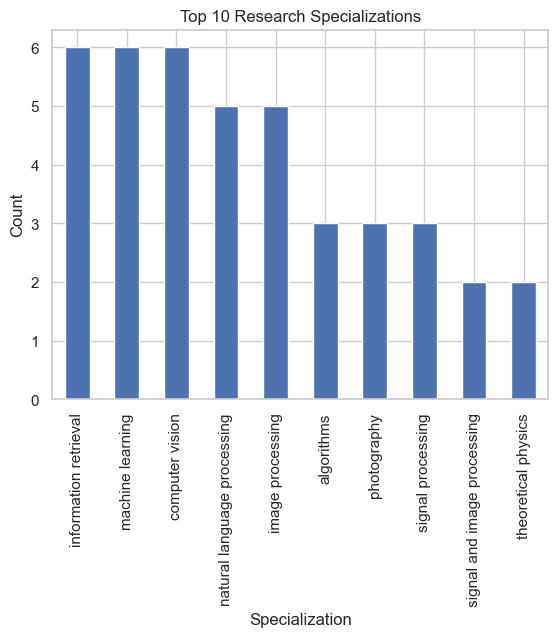

In [48]:
plt.figure()
top_specs.plot(kind="bar")
plt.title("Top 10 Research Specializations")
plt.xlabel("Specialization")
plt.ylabel("Count")
plt.show()


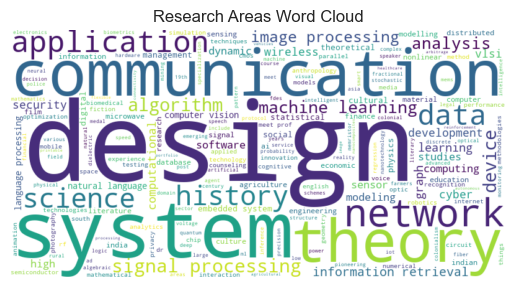

In [33]:
from wordcloud import WordCloud

text = " ".join(all_specializations)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Research Areas Word Cloud")
plt.show()


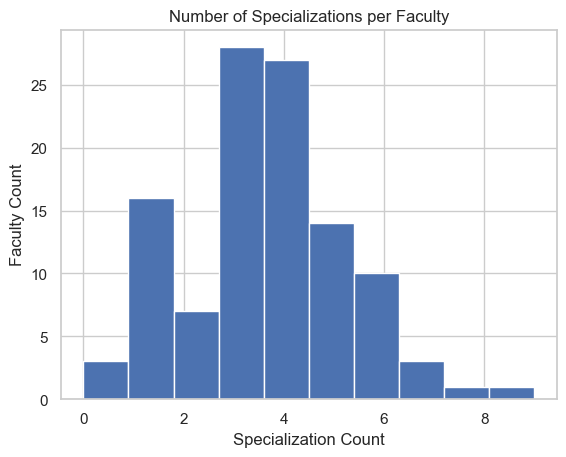

In [28]:
df["num_specializations"] = df["specialization_list"].apply(len)

plt.figure()
df["num_specializations"].plot(kind="hist", bins=10)
plt.title("Number of Specializations per Faculty")
plt.xlabel("Specialization Count")
plt.ylabel("Faculty Count")
plt.show()



In [29]:
spec_by_type = (
    df.explode("specialization_list")
      .groupby("faculty_type")["specialization_list"]
      .value_counts()
      .groupby(level=0)
      .head(3)
)

spec_by_type


faculty_type                   specialization_list                                                                     
Adjunct Faculty                natural language processing                                                                 2
                               photography                                                                                 2
                               & h…                                                                                        1
Adjunct faculty international  information retrieval                                                                       3
                               algorithmics                                                                                1
                               analysis and implementation of algorithms for problems arising in computational geometry    1
Distinguished Professor        and quantitative modeling.                                                                  1
     

In [10]:
missing_analysis = pd.DataFrame({
    "Column": df.columns,
    "Missing Count": df.isnull().sum().values,
    "Missing Percentage": ((df.isnull().sum() / len(df)) * 100).round(2).values
})
missing_analysis


,Column,Missing Count,Missing Percentage
0,faculty_id,0,0.00
1,name,0,0.00
2,faculty_type,0,0.00
3,education,2,1.82
4,bio,0,0.00
5,specialization_list,0,0.00
6,research_tags,0,0.00
7,email,0,0.00
8,phone,0,0.00
9,address,0,0.00


In [18]:
def column_missing_stats(column):
    return {
        "Null (NaN)": df[column].isnull().sum(),
        "Not Available": (df[column] == "Not Available").sum() if df[column].dtype == "object" else 0,
        "Empty String": (df[column] == "").sum() if df[column].dtype == "object" else 0
    }

missing_stats = pd.DataFrame({
    col: column_missing_stats(col) for col in df.columns
}).T

missing_stats


,Null (NaN),Not Available,Empty String
faculty_id,0,0,0
name,0,0,0
faculty_type,0,0,0
education,2,0,0
bio,0,0,0
specialization_list,0,0,0
research_tags,0,0,0
email,0,1,0
phone,0,32,0
address,0,35,0
